In [1]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

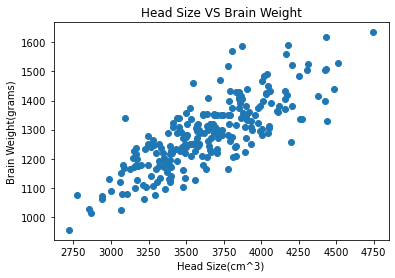

In [2]:
data = pd.read_csv("./headbrain.csv")  # ../BrainSize/homo_sapiens/
data.head()

# Visualize data
head = "Head Size(cm^3)"
brain = "Brain Weight(grams)"
plt.scatter(data[head], data[brain])
plt.xlabel(head)
plt.ylabel(brain)
plt.title("Head Size VS Brain Weight")
plt.show()

In [3]:
# Train / test splitting dataset
train, test = train_test_split(data,  test_size = 0.2)

# Converting training data into tensors for Pytorch
X_train = torch.Tensor([[x] for x in list(train[head])])
y_train = torch.torch.FloatTensor([[x] for x in list(train[brain])])

# Converting test data into tensors for Pytorch
X_test = torch.Tensor([[x] for x in list(test[head])])
y_test = torch.torch.FloatTensor([[x] for x in list(test[brain])])

In [4]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out
    
def norm(x):
    """ x : torch.tensor"""
    return (x - x.mean()) / x.std()

In [5]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.1 # 0.2  # / 10**20
epochs = 100

model = linearRegression(inputDim, outputDim)
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

epochs_cache = []
losses_cache = []
x_norm = norm(X_train)

for epoch in range(epochs):
#     # Converting inputs and labels to Variable
#     inputs = Variable(x_norm)
#     labels = Variable(x_norm)

    # get output from the model, given the inputs
    outputs = model(x_norm)  # inputs
    
    # get loss for the predicted output
    loss = criterion(outputs, y_train)  # labels

    # get gradients w.r.t to parameters
    loss.backward()
    
    # update parameters
    optimizer.step()
    
    # Clear gradient buffers because we don't want any gradient from
    # previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()
    
    epochs_cache.append(epoch)
    losses_cache.append(loss)

for epoch, loss in zip(epochs_cache[:10] + epochs_cache[-5:], 
                       losses_cache[:10] + losses_cache[-5:]):
    print('epoch {}, loss {}'.format(epoch, loss))

epoch 0, loss 1669858.0
epoch 1, loss 1070580.625
epoch 2, loss 687037.625
epoch 3, loss 441565.96875
epoch 4, loss 284461.90625
epoch 5, loss 183913.75
epoch 6, loss 119561.9921875
epoch 7, loss 78376.265625
epoch 8, loss 52016.99609375
epoch 9, loss 35146.7890625
epoch 95, loss 5154.119140625
epoch 96, loss 5154.119140625
epoch 97, loss 5154.119140625
epoch 98, loss 5154.119140625
epoch 99, loss 5154.119140625


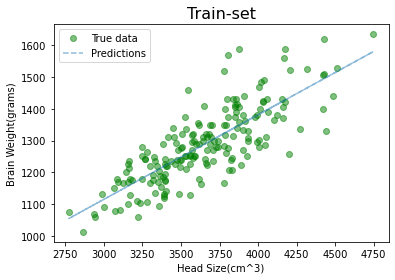

In [6]:
with torch.no_grad(): # we don't need gradients in the testing phase
    predicted = model(Variable(x_norm)).data.numpy()
#     print(predicted)

plt.clf()
plt.plot(X_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(X_train, predicted, '--', label='Predictions', alpha=0.5)
plt.title("Train-set", fontsize=16)
plt.xlabel(head)
plt.ylabel(brain)
plt.legend(loc='best')
plt.show()

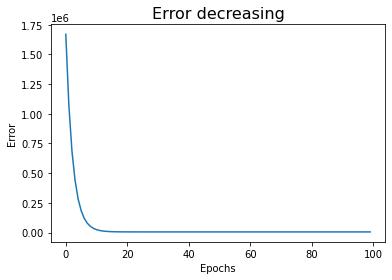

In [7]:
plt.plot(epochs_cache, losses_cache)
plt.title("Error decreasing", fontsize=16)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()
plt.close()

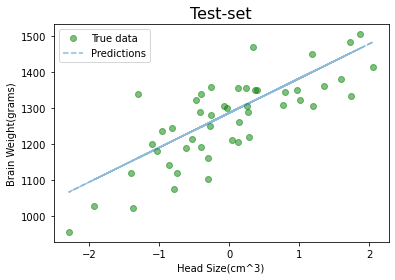

In [8]:
with torch.no_grad(): # we don't need gradients in the testing phase
    X_test = norm(X_test)
    predicted = model(Variable(X_test)).data.numpy()

    
plt.clf()
plt.plot(X_test, y_test, 'go', label='True data', alpha=0.5)
plt.plot(X_test, predicted, '--', label='Predictions', alpha=0.5)
plt.title("Test-set", fontsize=16)
plt.xlabel(head)
plt.ylabel(brain)

plt.legend(loc='best')
plt.show()